In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
num_rows = df.shape[0] #Provide the number of rows in the dataset
num_cols = df.shape[1] #Provide the number of columns in the dataset
print("num of rows: ", num_rows, ";", "num of cols: ", num_cols)

num of rows:  51392 ; num of cols:  154


In [4]:
#Provide a set of column names that have no missing values.
no_nulls = set(df.columns[df.isnull().mean()==0])
print(no_nulls)

{'University', 'Professional', 'Respondent', 'ProgramHobby', 'FormalEducation', 'Country', 'EmploymentStatus'}


In [5]:
#Provide a set of column name that have more than 75% if their values missing.
most_missing_cols = set(df.columns[df.isnull().mean() > 0.75])
print(most_missing_cols)

{'ExCoderBalance', 'ExCoderWillNotCode', 'ExCoderBelonged', 'WebDeveloperType', 'ExCoderSkills', 'ExCoder10Years', 'ExCoderNotForMe', 'ExCoderActive', 'TimeAfterBootcamp', 'ExCoderReturn', 'ExpectedSalary', 'MobileDeveloperType', 'YearsCodedJobPast', 'NonDeveloperType'}


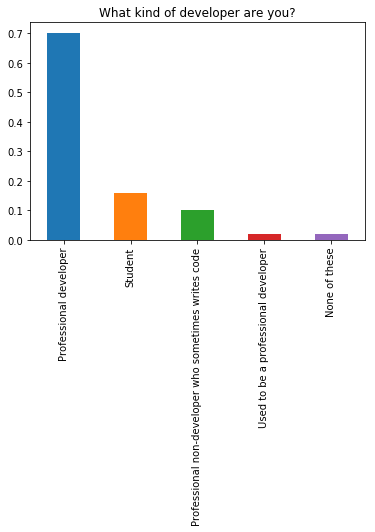

In [6]:
#Provide a pandas series of the counts for each Professional status
status_vals = df.Professional.value_counts()
(status_vals/df.shape[0]).plot(kind="bar");
plt.title("What kind of developer are you?");

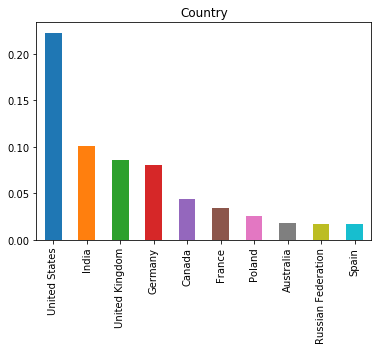

In [7]:
#Provide a pandas series of the counts for each Country
count_vals = df.Country.value_counts()

(count_vals[:10]/df.shape[0]).plot(kind="bar");
plt.title("Country");

In [17]:
country_salary = pd.DataFrame(df.query("Professional == 'Professional developer' and (Gender == 'Male' or Gender == 'Female')").groupby(['Country']).mean()['Salary']).sort_values(by='Salary', ascending=False)
list(country_salary.index)

['Virgin Islands (USA)',
 'U.S. Minor Outlying Islands',
 'Uganda',
 'Kuwait',
 'United States',
 'Liechtenstein',
 'Switzerland',
 'Iceland',
 'Guam',
 'Bahrain',
 'Norway',
 'Puerto Rico',
 'Guinea',
 'Australia',
 'Israel',
 'Nicaragua',
 'Denmark',
 'New Zealand',
 'Ireland',
 'Albania',
 'Canada',
 'Cayman Islands',
 'Thailand',
 'United Kingdom',
 'Germany',
 'Cyprus',
 'Netherlands',
 'Sweden',
 'Guatemala',
 'Ghana',
 'Luxembourg',
 'Austria',
 'Finland',
 'Singapore',
 'Hong Kong',
 'France',
 'Uruguay',
 'South Korea',
 'Japan',
 'Belgium',
 'China',
 'Costa Rica',
 'I prefer not to say',
 'Macedonia',
 'Madagascar',
 'Spain',
 'South Africa',
 'Latvia',
 'Uzbekistan',
 'Italy',
 'Estonia',
 'New Caledonia (French)',
 'United Arab Emirates',
 'Barbados',
 'Malta',
 'Slovenia',
 'Bangladesh',
 'Argentina',
 'Peru',
 'Belarus',
 'Martinique (French)',
 'Venezuela',
 'Panama',
 'Greece',
 'Serbia',
 'Saudi Arabia',
 'Croatia',
 'Hungary',
 'Ecuador',
 'Bulgaria',
 'Ukraine',
 'S

In [42]:
#Define some countries to western and eastern
western = ['United States', 'Liechtenstein', 'Switzerland', 
           'Iceland', 'Norway', 'Israel', 'Denmark', 
           'Ireland', 'Canada', 'United Kingdom', 'Germany', 
           'Netherlands', 'Sweden', 'Luxembourg', 'Austria', 
           'Finland', 'France', 'Belgium', 'Spain', 'Italy',
           'Poland']

eastern = ['Thailand', 'Singapore', 'Hong Kong', 
           'South Korea', 'Japan', 'China', 
           'Taiwan', 'Malaysia', 'India', 
           'Indonesia', 'Vietnam']

In [44]:
#Add a new catagory seperating to western and eastern
df['west_or_east'] = df['Country'].apply(lambda x: 'western' if x in western else ('eastern' if x in eastern else 'other'))

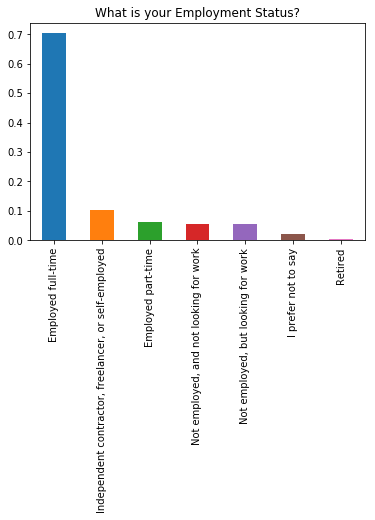

In [45]:
#Provide a pandas series of the counts for each Employment status
employment_status_vals = df.EmploymentStatus.value_counts()
(employment_status_vals/df.shape[0]).plot(kind="bar");
plt.title("What is your Employment Status?");

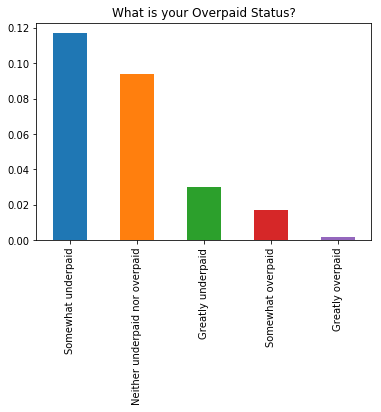

In [51]:
#Provide a pandas series of the counts for each Overpaid status
overpaid_status_vals = df.Overpaid.value_counts()
(overpaid_status_vals/df.shape[0]).plot(kind="bar");
plt.title("What is your Overpaid Status?");

In [67]:
useful_columns = ['Country', 'YearsCodedJob', 'EmploymentStatus', 'CareerSatisfaction', 'JobSatisfaction', 'JobSeekingStatus', 'HoursPerWeek', 'Salary', 'west_or_east', 'Overpaid']
useful_df = pd.DataFrame(df.query("Professional == 'Professional developer' and (Gender == 'Male' or Gender == 'Female') and EmploymentStatus == 'Employed full-time'"))[useful_columns]
useful_df.head()

,Country,YearsCodedJob,EmploymentStatus,CareerSatisfaction,JobSatisfaction,JobSeekingStatus,HoursPerWeek,Salary,west_or_east,Overpaid
2,United Kingdom,20 or more years,Employed full-time,8.0,9.0,NaN,NaN,113750.0,western,Neither underpaid nor overpaid
7,Poland,7 to 8 years,Employed full-time,7.0,7.0,"I'm not actively looking, but I am open to new...",1.0,NaN,western,NaN
8,Colombia,7 to 8 years,Employed full-time,6.0,6.0,I am not interested in new job opportunities,2.0,NaN,other,Neither underpaid nor overpaid
13,Germany,15 to 16 years,Employed full-time,8.0,6.0,I am actively looking for a job,3.0,NaN,western,NaN
14,United Kingdom,20 or more years,Employed full-time,8.0,8.0,NaN,NaN,100000.0,western,Somewhat underpaid


In [79]:
comparison = useful_df.groupby(['west_or_east','YearsCodedJob']).mean()
comparison

CareerSatisfaction  JobSatisfaction  \
west_or_east YearsCodedJob                                           
eastern      1 to 2 years                6.624444         5.891111   
             10 to 11 years              7.500000         6.550000   
             11 to 12 years              7.342857         6.828571   
             12 to 13 years              7.176471         6.088235   
             13 to 14 years              7.333333         7.666667   
             14 to 15 years              7.111111         6.222222   
             15 to 16 years              7.400000         6.900000   
             16 to 17 years              7.333333         6.888889   
             17 to 18 years              7.111111         6.777778   
             18 to 19 years              7.500000         7.500000   
             19 to 20 years              7.375000         7.500000   
             2 to 3 years                6.934555         6.191099   
             20 or more years            7.923077         7.076923   
             3 to 4 years                6.725352         5.996479   
             4 to 5 years                6.971698         6.440758   
             5 to 6 years                7.027778         6.416667   
             6 to 7 years                6.972477         6.645455   
             7 to 8 years                6.871429         6.614286   
             8 to 9 years                7.022727         6.295455   
             9 to 10 years               6.746032         6.539683   
             Less than a year            6.597087         6.053140   
other        1 to 2 years                7.550943         6.869318   
             10 to 11 years              7.566820         6.972222   
             11 to 12 years              7.711340         7.329897   
             12 to 13 years              7.563218         7.091954   
             13 to 14 years              7.545455         7.227273   
             14 to 15 years              7.366197         7.157143   
             15 to 16 years              7.307692         7.131868   
             16 to 17 years              7.775000         7.662500   
             17 to 18 years              7.636364         7.333333   
...                                           ...              ...   
             20 or more years            7.726776         7.302198   
             3 to 4 years                7.426716         6.795539   
             4 to 5 years                7.586047         6.965116   
             5 to 6 years                7.353690         6.923469   
             6 to 7 years                7.180769         6.676923   
             7 to 8 years                7.639405         7.178439   
             8 to 9 years                7.625731         6.836257   
             9 to 10 years               7.621622         7.126126   
             Less than a year            7.171053         6.890351   
western      1 to 2 years                7.585460         7.152713   
             10 to 11 years              7.531700         7.101010   
             11 to 12 years              7.570652         7.062842   
             12 to 13 years              7.593939         7.039394   
             13 to 14 years              7.444000         7.008000   
             14 to 15 years              7.501475         7.041298   
             15 to 16 years              7.514589         7.084881   
             16 to 17 years              7.603448         7.155172   
             17 to 18 years              7.699634         7.315018   
             18 to 19 years              7.543590         7.102564   
             19 to 20 years              7.504950         6.900990   
             2 to 3 years                7.586183         7.137474   
             20 or more years            7.851955         7.332635   
             3 to 4 years                7.519440         7.024143   
             4 to 5 years                7.526724         7.006908   
             5 to 6 years                

In [87]:
year_map = {'1 to 2 years' : 1, 
            '10 to 11 years' : 10, 
            '11 to 12 years' : 11, 
            '12 to 13 years' : 12,
            '13 to 14 years' : 13, 
            '14 to 15 years' : 14, 
            '15 to 16 years' : 15, 
            '16 to 17 years' : 16,
            '17 to 18 years' : 17, 
            '18 to 19 years' : 18, 
            '19 to 20 years' : 19, 
            '2 to 3 years' : 2,
            '20 or more years' : 20, 
            '3 to 4 years' : 3, 
            '4 to 5 years' : 4, 
            '5 to 6 years' : 5, 
            '6 to 7 years' : 6, 
            '7 to 8 years' : 7, 
            '8 to 9 years' : 8, 
            '9 to 10 years' : 9, 
            'Less than a year' : 0}

1

In [133]:
comparison_graph = comparison.reset_index()
comparison_graph['YearsCodedJob'] = comparison_graph['YearsCodedJob'].apply(lambda x: year_map[x])

In [134]:
comparison_graph['YearsCodedJob'] = pd.to_numeric(comparison_graph['YearsCodedJob'])

In [135]:
comparison_graph = comparison_graph.sort_values(by='YearsCodedJob')

In [136]:
comparison_graph.set_index('YearsCodedJob', inplace=True)

Text(0,0.5,'Average Salary')

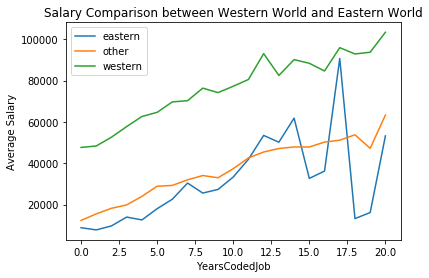

In [137]:

comparison_graph.groupby('west_or_east')['Salary'].plot(legend=True)
plt.title("Salary Comparison between Western World and Eastern World");
plt.xlabel('YearsCodedJob')
plt.ylabel('Average Salary')

Text(0,0.5,'Job Satisfaction')

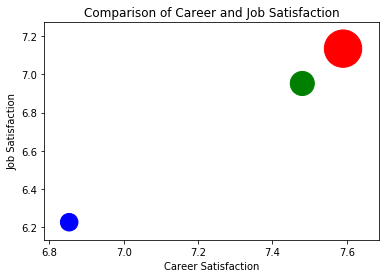

In [65]:
plt.scatter(comparison.CareerSatisfaction, comparison.JobSatisfaction, comparison.Salary/50, c=['red','green','blue'])
plt.title('Comparison of Career and Job Satisfaction')
plt.xlabel('Career Satisfaction')
plt.ylabel('Job Satisfaction')